## 1. Where are the old left-handed people?

<p>In this notebook, we will explore this phenomenon using age distribution data to see if we can reproduce a difference in average age at death purely from the changing rates of left-handedness over time, refuting the claim of early death for left-handers. This notebook uses <code>pandas</code> and Bayesian statistics to analyze the probability of being a certain age at death given that you are reported as left-handed or right-handed.</p>
<p>A National Geographic survey in 1986 resulted in over a million responses that included age, sex, and hand preference for throwing and writing. Researchers Avery Gilbert and Charles Wysocki analyzed this data and noticed that rates of left-handedness were around 13% for people younger than 40 but decreased with age to about 5% by the age of 80. They concluded based on analysis of a subgroup of people who throw left-handed but write right-handed that this age-dependence was primarily due to changing social acceptability of left-handedness. This means that the rates aren't a factor of <em>age</em> specifically but rather of the <em>year you were born</em>, and if the same study was done today, we should expect a shifted version of the same distribution as a function of age. Ultimately, we'll see what effect this changing rate has on the apparent mean age of death of left-handed people, but let's start by plotting the rates of left-handedness as a function of age.</p>
<p>This notebook uses two datasets: <a href="https://www.cdc.gov/nchs/data/statab/vs00199_table310.pdf">death distribution data</a> for the United States from the year 1999 (source website <a href="https://www.cdc.gov/nchs/nvss/mortality_tables.htm">here</a>) and rates of left-handedness digitized from a figure in this <a href="https://www.ncbi.nlm.nih.gov/pubmed/1528408">1992 paper by Gilbert and Wysocki</a>. </p>

Text(0.5, 1.0, 'Left-handedness rates of Males and Females Against the Age')

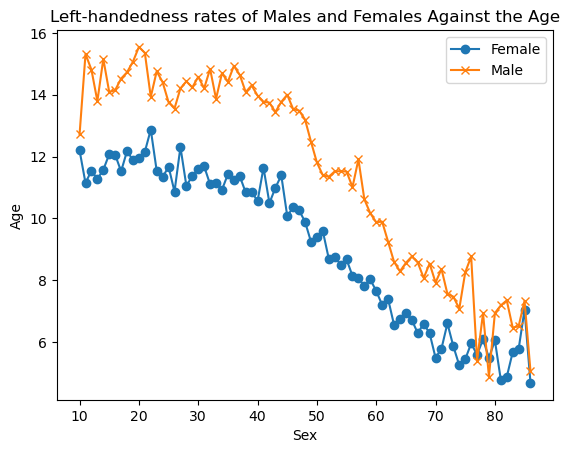

In [2]:
# import libraries
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import matplotlib.pyplot as plt
# load the data
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

# plot male and female left-handedness rates vs. age
%matplotlib inline
fig, ax = plt.subplots() # create figure and axis objects
ax.plot('Age', 'Female', data = lefthanded_data, marker = 'o') # plot "Female" vs. "Age"
ax.plot('Age', 'Male', data = lefthanded_data, marker = 'x') # plot "Male" vs. "Age"
ax.legend() # add a legend
ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_title("Left-handedness rates of Males and Females Against the Age")

# Code Breakdown:
The code begins by importing two key libraries:
1. pandas(imported as pd) for handling and analyzing data.
2. matplotlib.pyplot(imported as plt) for creating visualizations.

It then defines a variable "data_url_1" which stores the url to the dataset.

The dataset is loaded from the specified url using "pd.read_csv", and the data is stored in a dataframe called "lefthanded_data".

To ensure that any plots created using matplotlib are displayed correctly, the command "%matplotlib inline" is used.

Next, a figure and axis for plotting are created using "fig, ax = plt.subplots()".
The code then plots left-handedness rates for females and males as a function of age:
1. ax.plot('Age', 'Female', data=lefthanded_data, marker='o') plots female left-handedness rates by age, using circle markers.
2. ax.plot('Age', 'Male', data=lefthanded_data, marker='x') plots male left-handedness rates by age, using cross markers.

A legend is added to distinguish between the two lines with ax.legend().

The code sets axis labels as follows:
1. The x-axis is labeled "Age" with ax.set_xlabel('Age').
2. The y-axis is labeled "Left-handedness Rate" with ax.set_ylabel('Left-handedness Rate').
Once the code runs, it will generate a plot that shows left-handedness rates for males and females at different ages.

## 2. Rates of left-handedness over time
<p>Let's convert this data into a plot of the rates of left-handedness as a function of the year of birth, and average over male and female to get a single rate for both sexes. </p>
<p>Since the study was done in 1986, the data after this conversion will be the percentage of people alive in 1986 who are left-handed as a function of the year they were born. </p>

Text(0.5, 1.0, 'Average Number of Male and Female Left-handed peple over the period of time')

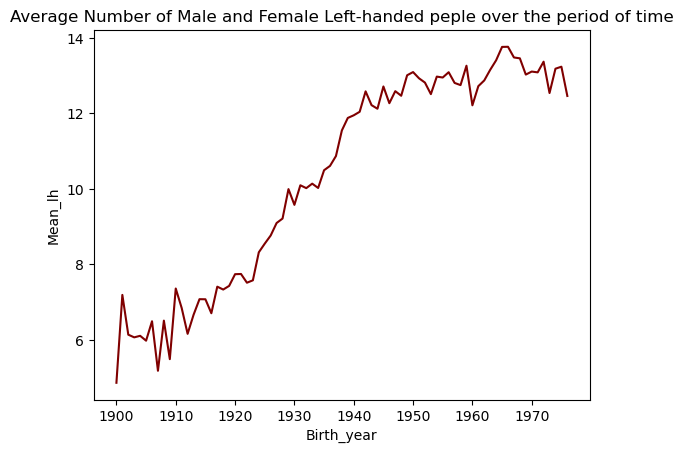

In [5]:
# create a new column for birth year of each age
# ... YOUR CODE FOR TASK 2 ...
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']
# create a new column for the average of male and female
# ... YOUR CODE FOR TASK 2 ...
lefthanded_data['Mean_lh'] = lefthanded_data[['Male', 'Female']].mean(axis=1)
# create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig, ax = plt.subplots()
ax.plot('Birth_year', 'Mean_lh', data = lefthanded_data, color ='maroon') # plot 'Mean_lh' vs. 'Birth_year'
ax.set_xlabel('Birth_year') # set the x label for the plot
ax.set_ylabel('Mean_lh') # set the y label for the plot
ax.set_title("Average Number of Male and Female Left-handed peple over the period of time")

# Code Breakdown:
The updated code builds on the previous version by adding functionality to calculate the average left-handedness rates for males and females and then plot this average against birth years. Here's how it works:

First, a new column, 'Birth_year', is added to the lefthanded_data DataFrame. The birth year is calculated by subtracting the values in the 'Age' column from 1986 (the year the study was done), and the result is stored in the 'Birth_year' column.

Next, a new column called 'Mean_lh' is created. This column holds the average left-handedness rates for males and females. The code calculates the mean by averaging the 'Male' and 'Female' columns row-wise using "lefthanded_data[['Male', 'Female']].mean(axis=1)", and the results are stored in the 'Mean_lh' column.

A new plot is created using fig, ax = plt.subplots(), and the 'Mean_lh' values are plotted against the 'Birth_year' values using ax.plot('Birth_year', 'Mean_lh', data=lefthanded_data).

Finally, the plot is labeled:

The x-axis is labeled 'Birth_year' using ax.set_xlabel('Birth_year').
The y-axis is labeled 'Mean_lh' using ax.set_ylabel('Mean_lh').
Running this code will generate a plot that shows the average left-handedness rates over time, with birth years on the x-axis and average left-handedness rates on the y-axis, displayed as a connected line.

## 3. Applying Bayes' rule
<p>The probability of dying at a certain age given that you're left-handed is <strong>not</strong> equal to the probability of being left-handed given that you died at a certain age. This inequality is why we need <strong>Bayes' theorem</strong>, a statement about conditional probability which allows us to update our beliefs after seeing evidence. </p>
<p>We want to calculate the probability of dying at age A given that you're left-handed. Let's write this in shorthand as P(A | LH). We also want the same quantity for right-handers: P(A | RH). </p>
<p>Here's Bayes' theorem for the two events we care about: left-handedness (LH) and dying at age A.</p>
<p>$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$</p>
<p>P(LH | A) is the probability that you are left-handed <em>given that</em> you died at age A. P(A) is the overall probability of dying at age A, and P(LH) is the overall probability of being left-handed. We will now calculate each of these three quantities, beginning with P(LH | A).</p>
<p>To calculate P(LH | A) for ages that might fall outside the original data, we will need to extrapolate the data to earlier and later years. Since the rates flatten out in the early 1900s and late 1900s, we'll use a few points at each end and take the mean to extrapolate the rates on each end. The number of points used for this is arbitrary, but we'll pick 10 since the data looks flat-ish until about 1910. </p>

In [6]:
# import library
# ... YOUR CODE FOR TASK 3 ...
import numpy as np
# create a function for P(LH | A)
def P_lh_given_A(ages_of_death, study_year = 1990):
    """ P(Left-handed | ages of death), calculated based on the reported rates of left-handedness.
    Inputs: numpy array of ages of death, study_year
    Returns: probability of left-handedness given that subjects died in `study_year` at ages `ages_of_death` """
    
    # Use the mean of the 10 last and 10 first points for left-handedness rates before and after the start 
    early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean() 
    late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10 # the youngest age is 10
    oldest_age = study_year - 1986 + 86 # the oldest age is 86
    
    P_return = np.zeros(ages_of_death.shape) # create an empty array to store the results
    # extract rate of left-handedness for people of ages 'ages_of_death'
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
    
    return P_return

## 4. When do people normally die?
<p>To estimate the probability of living to an age A, we can use data that gives the number of people who died in a given year and how old they were to create a distribution of ages of death. If we normalize the numbers to the total number of people who died, we can think of this data as a probability distribution that gives the probability of dying at age A. The data we'll use for this is from the entire US for the year 1999 - the closest I could find for the time range we're interested in. </p>
<p>In this block, we'll load in the death distribution data and plot it. The first column is the age, and the other columns are the number of people who died at that age. </p>

Text(0.5, 1.0, 'Number Of Left-handed People Died Based on Age')

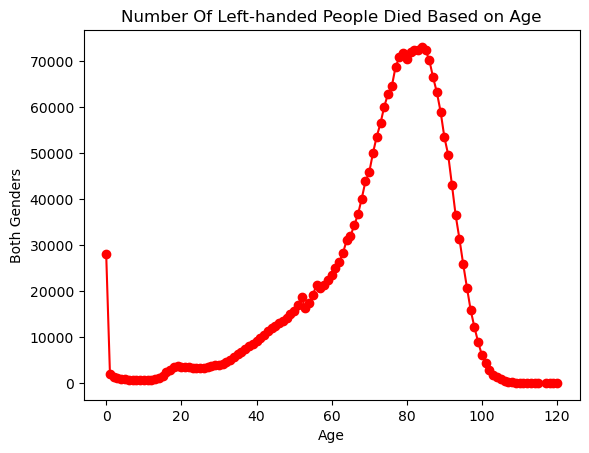

In [8]:
# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

# load death distribution data
# ... YOUR CODE FOR TASK 4 ...
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])
# drop NaN values from the `Both Sexes` column
death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])
death_distribution_data = death_distribution_data.reset_index(drop=True)
# ... YOUR CODE FOR TASK 4 ...

# plot number of people who died as a function of age
# plot number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data, marker='o',color='red') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Age') 
ax.set_ylabel('Both Genders')
ax.set_title("Number Of Left-handed People Died Based on Age")

# Code Breakdown:
Above code introduces a new URL (data_url_2) and loads death distribution data from a TSV file. It then proceeds to plot the number of people who died as a function of age. Here's a breakdown of the code:

The code defines a new URL for the death distribution data as data_url_2.

It reads the death distribution data from the TSV file using pd.read_csv(data_url_2, sep='\t', skiprows=[1]). The sep='\t' argument specifies that the data is tab-separated, and skiprows=[1] skips the second row of the file, which contains irrelevant information.

The code drops any rows that have NaN (missing) values in the 'Both Sexes' column of the death_distribution_data DataFrame. This is done using death_distribution_data.dropna(subset=['Both Sexes']).

The index of the death_distribution_data DataFrame is reset using death_distribution_data.reset_index(drop=True) to ensure the index is sequential and starts from 0.

The code drops any remaining rows that have NaN values in the 'Both Sexes' column of the death_distribution_data DataFrame. This is done again using death_distribution_data.dropna(subset=['Both Sexes']).

A new figure and axis object are created using fig, ax = plt.subplots().

The code plots the number of people who died ('Both Sexes') as a function of age using ax.plot('Age', 'Both Sexes', data=death_distribution_data, marker='o').

The x-label of the plot is set to 'Age' using ax.set_xlabel('Age').

The y-label of the plot is set to 'Both Genders' using ax.set_ylabel('Both Genders').

By running this code, you should see a plot showing the number of people who died ('Both Sexes') as a function of age. The x-axis represents age, and the y-axis represents the number of people. The plot will have circular markers ('o') indicating the data points.

## 5. The overall probability of left-handedness
<p>In the previous code block we loaded data to give us P(A), and now we need P(LH). P(LH) is the probability that a person who died in our particular study year is left-handed, assuming we know nothing else about them. This is the average left-handedness in the population of deceased people, and we can calculate it by summing up all of the left-handedness probabilities for each age, weighted with the number of deceased people at each age, then divided by the total number of deceased people to get a probability. In equation form, this is what we're calculating, where N(A) is the number of people who died at age A (given by the dataframe <code>death_distribution_data</code>):</p>
<p><img src="https://i.imgur.com/gBIWykY.png" alt="equation" width="220"></p>
<!--- $$P(LH) = \frac{\sum_{\text{A}} P(LH | A) N(A)}{\sum_{\text{A}} N(A)}$$ -->

In [9]:
def P_lh(death_distribution_data, study_year = 1990): # sum over P_lh for each age group
    """ Overall probability of being left-handed if you died in the study year
    Input: dataframe of death distribution data, study year
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes'] * P_lh_given_A(death_distribution_data['Age'], study_year) # multiply number of dead people by P_lh_given_A
    p = np.sum(p_list) # calculate the sum of p_list
    return p / np.sum(death_distribution_data['Both Sexes']) # normalize to total number of people (sum of death_distribution_data['Both Sexes'])

print("Overall Probability Of Left-handedness In The Population For A Given Study Year Is:",P_lh(death_distribution_data))
dec_num = P_lh(death_distribution_data) * 100
print("The Above Value is mentioned in the form of percentage:",round(dec_num,2),"%")

Overall Probability Of Left-handedness In The Population For A Given Study Year Is: 0.07766387615350638
The Above Value is mentioned in the form of percentage: 7.77 %


# Code Breakdown:
The code defines a function called P_lh that calculates the overall probability of being left-handed for people who died in the study year. The function takes two inputs:

1. death_distribution_data (a DataFrame containing the death distribution).
2. study_year (the year the study was conducted).

Here’s how the function works:

1. The function starts by creating a list, p_list, which is the result of multiplying the number of deceased individuals (from the 'Both Sexes' column of death_distribution_data) by the probability of being left-handed (using a separate function P_lh_given_A).

2. Then, the total probability (p) is calculated by summing up the values in p_list.

3. Finally, the function returns the overall probability of being left-handed by dividing p by the total number of deceased individuals (i.e., the sum of the 'Both Sexes' column).

After defining the function, it’s called with the death_distribution_data DataFrame, and the result is printed using print(P_lh(death_distribution_data)).

By running this code, you'll see the overall probability of someone being left-handed among those who died in the study year, based on the provided data.

## 6. Putting it all together: dying while left-handed (i)
<p>Now we have the means of calculating all three quantities we need: P(A), P(LH), and P(LH | A). We can combine all three using Bayes' rule to get P(A | LH), the probability of being age A at death (in the study year) given that you're left-handed. To make this answer meaningful, though, we also want to compare it to P(A | RH), the probability of being age A at death given that you're right-handed. </p>
<p>We're calculating the following quantity twice, once for left-handers and once for right-handers.</p>
<p>$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$</p>
<p>First, for left-handers.</p>
<!--Notice that I was careful not to call these "probability of dying at age A", since that's not actually what we're calculating: we use the exact same death distribution data for each. -->

In [10]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) # use P_lh function to get probability of left-handedness overall
    P_lh_A = P_lh_given_A(ages_of_death, study_year) # use P_lh_given_A to get probability of left-handedness for a certain age
    return P_lh_A*P_A/P_left

# Code Breakdown:
The code defines a function called P_A_given_lh, which calculates the probability of being a certain age at death, given that the person is left-handed. 

The function uses three inputs:
1. ages_of_death: a numpy array of different ages at death.
2. death_distribution_data: a DataFrame containing data on how many people died at different ages.
3. study_year: the year the study was done.

Here’s how the function works:

1. First, the function calculates the probability (P_A) of dying at a specific age by dividing the number of people who died at that age (from the 'Both Sexes' column in death_distribution_data) by the total number of people who died (sum of the 'Both Sexes' column).

2. It then calculates the overall probability of being left-handed (P_left) by calling the previously defined P_lh function, using the death_distribution_data and study_year.

3. The function calculates the probability of being left-handed at a specific age (P_lh_A) by calling another function, P_lh_given_A, with the ages_of_death and study_year.

4. Finally, the function returns the product of P_lh_A, P_A, and the inverse of P_left, which gives the overall probability of being a certain age at death, given that the person is left-handed.

By running this function, you can find out the probability of being a specific age at death if the person is known to be left-handed, based on the death data and study year.

## 7. Putting it all together: dying while left-handed (ii)
<p>And now for right-handers.</p>

In [11]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're right-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1 - P_lh(death_distribution_data, study_year) # either you're left-handed or right-handed, so P_right = 1 - P_left
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year) # P_rh_A = 1 - P_lh_A 
    return P_rh_A*P_A/P_right

# Code Breakdown:
The code introduces a function called P_A_given_rh, which calculates the probability of being a certain age at death, given that the person is right-handed. This is similar to the previous function for left-handedness but focuses on right-handed people.

The function takes the same three inputs:

1. ages_of_death (a numpy array of ages at death),
2. death_distribution_data (a DataFrame with death distribution data),
3. study_year (the year of the study).

Here’s how it works:

1. It calculates the probability (P_A) of dying at a specific age using the same method as before: dividing the number of deaths at that age by the total number of deaths.

2. The overall probability of being right-handed (P_right) is found by subtracting the probability of being left-handed (P_lh) from 1, since a person is either left-handed or right-handed.

3. The probability of being right-handed at a specific age (P_rh_A) is calculated by subtracting the probability of being left-handed at that age (P_lh_given_A) from 1.

4. Finally, the function returns the product of P_rh_A, P_A, and the inverse of P_right. This gives the overall probability of being a certain age at death, given that the person is right-handed.

By using this function, you can calculate the likelihood of being a specific age at death if the person is known to be right-handed, based on the death data and study year.

## 8. Plotting the distributions of conditional probabilities
<p>Now that we have functions to calculate the probability of being age A at death given that you're left-handed or right-handed, let's plot these probabilities for a range of ages of death from 6 to 120. </p>
<p>Notice that the left-handed distribution has a bump below age 70: of the pool of deceased people, left-handed people are more likely to be younger. </p>

Text(0.5, 1.0, 'Probability of Left-handed and Right-Handed People')

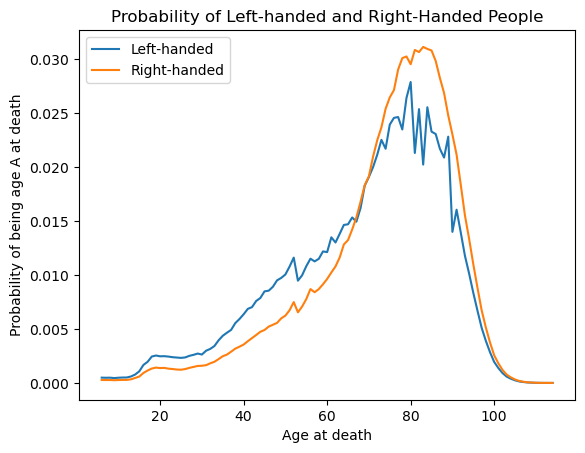

In [12]:
ages = np.arange(6, 115, 1) # make a list of ages of death to plot

# calculate the probability of being left- or right-handed for each 
left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

# create a plot of the two probabilities vs. age
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = 'Right-handed')
ax.legend() # add a legend
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")
ax.set_title("Probability of Left-handed and Right-Handed People")

# Code Breakdown:
The code calculates the probabilities of being left-handed or right-handed for each age at death, from 6 to 114 years old, and then creates a plot showing these probabilities.

Here’s how it works:

1. It uses numpy.arange to create an array called ages, which includes ages from 6 to 114 with a step of 1.

2. The probabilities of being left-handed (left_handed_probability) and right-handed (right_handed_probability) for each age are calculated by calling the P_A_given_lh and P_A_given_rh functions. These functions take the ages array and death_distribution_data as inputs.

3. The code then creates a plot using plot(), where two lines are drawn:
    
    a. One line represents the left-handed probabilities.
    
    b. The other line represents the right-handed probabilities.
    
    c. Labels are added to each line, so they show up in the plot's legend. The legend is added using the legend() function.


4. The x-axis is labeled "Age at death," and the y-axis is labeled "Probability of being age A at death."

## 9. Moment of truth: age of left and right-handers at death
<p>Finally, let's compare our results with the original study that found that left-handed people were nine years younger at death on average. We can do this by calculating the mean of these probability distributions in the same way we calculated P(LH) earlier, weighting the probability distribution by age and summing over the result.</p>
<p>$$\text{Average age of left-handed people at death} = \sum_A A P(A | LH)$$</p>
<p>$$\text{Average age of right-handed people at death} = \sum_A A P(A | RH)$$</p>

In [14]:
# calculate average ages for left-handed and right-handed groups
# use np.array so that two arrays can be multiplied
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

# print the average ages for each group
# ... YOUR CODE FOR TASK 9 ...
print("Average age of left-handed =" , str(average_lh_age))
print("Average age of right-handed =" , str(average_rh_age))

# print the difference between the average ages
print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

Average age of left-handed = 67.24503662801027
Average age of right-handed = 72.79171936526477
The difference in average ages is 5.5 years.


# Code Breakdown:
he code calculates the average age at death for both left-handed and right-handed groups using the probabilities of being a specific age at death for each group. It then prints the average ages and the difference between them.

Here’s how it works:

1. The np.nansum function is used to calculate the weighted average age by multiplying the ages array by the corresponding probabilities (left_handed_probability or right_handed_probability) and summing the results.

2. The average age for left-handed individuals is calculated by multiplying each age in the ages array by the left-handed probabilities, then summing the products.

3. The same process is used to calculate the average age for right-handed individuals, using the right-handed probabilities.

4. The average ages for both groups are printed.

5. The difference in average ages between the right-handed and left-handed groups is calculated by subtracting the average age of the left-handed group from the average age of the right-handed group, and the result is rounded to one decimal place.

6. The difference is then printed.

## 10. Final comments
<p>We got a pretty big age gap between left-handed and right-handed people purely as a result of the changing rates of left-handedness in the population, which is good news for left-handers: you probably won't die young because of your sinisterness. The reported rates of left-handedness have increased from just 3% in the early 1900s to about 11% today, which means that older people are much more likely to be reported as right-handed than left-handed, and so looking at a sample of recently deceased people will have more old right-handers.</p>
<p>Our number is still less than the 9-year gap measured in the study. It's possible that some of the approximations we made are the cause: </p>
<ol>
<li>We used death distribution data from almost ten years after the study (1999 instead of 1991), and we used death data from the entire United States instead of California alone (which was the original study). </li>
<li>We extrapolated the left-handedness survey results to older and younger age groups, but it's possible our extrapolation wasn't close enough to the true rates for those ages. </li>
</ol>
<p>One thing we could do next is figure out how much variability we would expect to encounter in the age difference purely because of random sampling: if you take a smaller sample of recently deceased people and assign handedness with the probabilities of the survey, what does that distribution look like? How often would we encounter an age gap of nine years using the same data and assumptions? We won't do that here, but it's possible with this data and the tools of random sampling. </p>
<!-- I did do this if we want to add more tasks - it would probably take three more blocks.-->
<p>To finish off, let's calculate the age gap we'd expect if we did the study in 2018 instead of in 1990. The gap turns out to be much smaller since rates of left-handedness haven't increased for people born after about 1960. Both the National Geographic study and the 1990 study happened at a unique time - the rates of left-handedness had been changing across the lifetimes of most people alive, and the difference in handedness between old and young was at its most striking. </p>

In [15]:
# Calculate the probability of being left- or right-handed for all ages
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, 2018)

# calculate average ages for left-handed and right-handed groups
average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))
print("The Avereage age of left-handed people is:", str(average_lh_age_2018))
print("The Avereage age of right-handed people is:", str(average_rh_age_2018))
print("The difference in average ages is " + 
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The Avereage age of left-handed people is: 70.28773299940532
The Avereage age of right-handed people is: 72.62899693809848
The difference in average ages is 2.3 years.


# Code Breakdown:
The code calculates the probabilities of being left-handed or right-handed at every age using death distribution data for the year 2018. It then calculates the average age at death for both left-handed and right-handed groups and prints the difference between these average ages for 2018.

Here’s a simple breakdown:

1. The left-handed (left_handed_probability_2018) and right-handed (right_handed_probability_2018) probabilities are calculated using the P_A_given_lh and P_A_given_rh functions. These functions take the ages array, the death_distribution_data DataFrame, and the year 2018 as inputs.

2. The average age for both left-handed and right-handed groups is calculated by multiplying each age in the ages array by the corresponding probabilities and then summing the results using np.nansum.

3. The difference between the average ages is calculated by subtracting the average age of the left-handed group from the right-handed group, with the result rounded to one decimal place.

4. Finally, the code prints the difference in average ages between the two groups for 2018.